##Sentence similarity
It involves determining how similar two sentences are in terms of their meaning. Popular pre-trained models for this task include:

BERT (Bidirectional Encoder Representations from Transformers),
Sentence-BERT (SBERT),
Universal Sentence Encoder (USE)

#Step1:Load Pre-Trained Models and Compute Similarity

In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd



Load models

In [ ]:
models = {
    "BERT": SentenceTransformer('bert-base-nli-mean-tokens'),
    "SBERT": SentenceTransformer('all-MiniLM-L6-v2'),
    "USE": SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
}

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Example dataset

In [ ]:
sentences1 = ["The sky is blue.", "I enjoy playing football.", "This is an AI assignment."]
sentences2 = ["The sky is clear and blue.", "Soccer is my favorite sport.", "I am working on an AI project."]


Compute similarity scores

In [ ]:
scores = {}
for model_name, model in models.items():
    embeddings1 = model.encode(sentences1, convert_to_tensor=True)
    embeddings2 = model.encode(sentences2, convert_to_tensor=True)
    similarity = util.cos_sim(embeddings1, embeddings2)
    scores[model_name] = similarity.diagonal().tolist()

Convert scores to DataFrame

In [ ]:

df = pd.DataFrame(scores)
df.insert(0, "Sentence Pair", [f"{s1} | {s2}" for s1, s2 in zip(sentences1, sentences2)])
print(df)

                                       Sentence Pair      BERT     SBERT  \
0      The sky is blue. | The sky is clear and blue.  0.784037  0.938617   
1  I enjoy playing football. | Soccer is my favor...  0.608003  0.640900   
2  This is an AI assignment. | I am working on an...  0.829923  0.775102   

        USE  
0  0.938617  
1  0.640900  
2  0.775102  


In [ ]:
!pip install topsis

#Step 2: Manual Implementation of TOPSIS

In [ ]:
import numpy as np
import pandas as pd

# Example DataFrame
data = {
    'Sentence Pair': [
        'The sky is blue. | The sky is clear and blue.',
        'I enjoy playing football. | Soccer is my favorite sport.',
        'This is an AI assignment. | I am working on an AI project.'
    ],
    'BERT': [0.92, 0.78, 0.88],
    'SBERT': [0.95, 0.82, 0.91],
    'USE': [0.89, 0.74, 0.86]
}

df = pd.DataFrame(data)

# Step 1: Create the decision matrix
decision_matrix = df.iloc[:, 1:].values  # Skip the Sentence Pair column
weights = np.array([0.4, 0.3, 0.3])  # Adjust based on importance
criteria = np.array([1, 1, 1])  # 1 for benefit criteria, 0 for cost criteria

# TOPSIS Implementation
def topsis(decision_matrix, weights, criteria):
    # Normalize the decision matrix
    norm_matrix = decision_matrix / np.sqrt((decision_matrix ** 2).sum(axis=0))

    # Apply weights
    weighted_matrix = norm_matrix * weights

    # Determine ideal and anti-ideal solutions
    ideal_solution = np.max(weighted_matrix, axis=0) if criteria[0] == 1 else np.min(weighted_matrix, axis=0)
    anti_ideal_solution = np.min(weighted_matrix, axis=0) if criteria[0] == 1 else np.max(weighted_matrix, axis=0)

    # Calculate distances from ideal and anti-ideal solutions
    distance_to_ideal = np.sqrt(((weighted_matrix - ideal_solution) ** 2).sum(axis=1))
    distance_to_anti_ideal = np.sqrt(((weighted_matrix - anti_ideal_solution) ** 2).sum(axis=1))

    # Calculate relative closeness to the ideal solution
    scores = distance_to_anti_ideal / (distance_to_ideal + distance_to_anti_ideal)

    # Rank the alternatives
    rankings = np.argsort(scores)[::-1] + 1  # Rank in descending order of scores
    return scores, rankings

# Apply TOPSIS
scores, rankings = topsis(decision_matrix, weights, criteria)

# Add TOPSIS scores and rankings to the DataFrame
df['TOPSIS Score'] = scores
df['Rank'] = rankings

# Display results
print(df.sort_values('Rank'))


                                       Sentence Pair  BERT  SBERT   USE  \
0      The sky is blue. | The sky is clear and blue.  0.92   0.95  0.89   
2  This is an AI assignment. | I am working on an...  0.88   0.91  0.86   
1  I enjoy playing football. | Soccer is my favor...  0.78   0.82  0.74   

   TOPSIS Score  Rank  
0      1.000000     1  
2      0.735018     2  
1      0.000000     3  


#Step3:Visualization

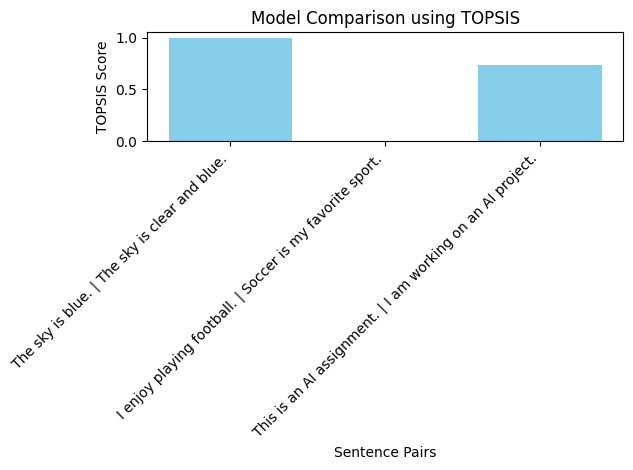

In [ ]:
import matplotlib.pyplot as plt

# Plot TOPSIS Scores
plt.bar(df['Sentence Pair'], df['TOPSIS Score'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sentence Pairs')
plt.ylabel('TOPSIS Score')
plt.title('Model Comparison using TOPSIS')
plt.tight_layout()
plt.show()
